In [112]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [114]:
data = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]

In [21]:
data.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


<Axes: >

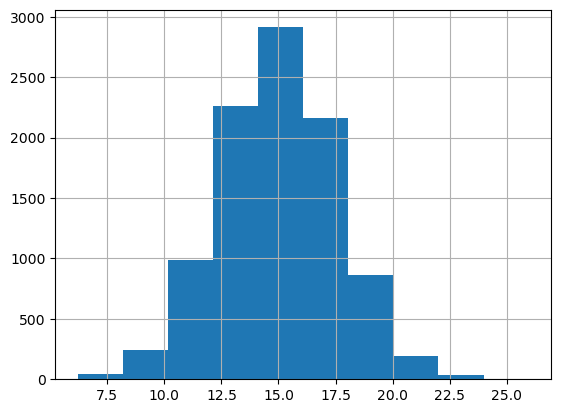

In [23]:
# does fuel_efficiency_mpg have a long tail?
data.fuel_efficiency_mpg.hist()

### Question 2

In [24]:
#median for horsepower
data.horsepower.median()

149.0

In [31]:
data.horsepower.mode()

0    152.0
Name: horsepower, dtype: float64

In [32]:
data.horsepower.value_counts()

horsepower
152.0    142
145.0    141
151.0    134
148.0    130
141.0    130
        ... 
46.0       1
43.0       1
53.0       1
66.0       1
61.0       1
Name: count, Length: 192, dtype: int64

### Question 1

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [145]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [146]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

### Question 3

### Training a linear regression model

`df1` - missing data of horsepower column filled with mean

`df2` - missing data of horsepower column filled with zeros

In [117]:
df2 = data.copy()
df2.horsepower = data.horsepower.fillna(0)

df1 = data.copy()
df1.horsepower = data.horsepower.fillna(data.horsepower.mean())

In [65]:
df2.info(), df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           9704 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           9704 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory 

(None, None)

In [118]:
df2_train = df2.iloc[idx[:n_train]]
df2_val = df2.iloc[idx[n_train:n_train+n_val]]
df2_test = df2.iloc[idx[n_train+n_val:]]

df1_train = df1.iloc[idx[:n_train]]
df1_val = df1.iloc[idx[n_train:n_train+n_val]]
df1_test = df1.iloc[idx[n_train+n_val:]]

In [119]:
y1_train = df1_train.fuel_efficiency_mpg.values
y1_val = df1_val.fuel_efficiency_mpg.values
y1_test = df1_test.fuel_efficiency_mpg.values

y2_train = df2_train.fuel_efficiency_mpg.values
y2_val = df2_val.fuel_efficiency_mpg.values
y2_test = df2_test.fuel_efficiency_mpg.values

In [120]:
del df1_train['fuel_efficiency_mpg']
del df1_val['fuel_efficiency_mpg']
del df1_test['fuel_efficiency_mpg']

del df2_train['fuel_efficiency_mpg']
del df2_val['fuel_efficiency_mpg']
del df2_test['fuel_efficiency_mpg']

In [122]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [123]:
w0_1, w_1 = train_linear_regression(df1_train, y1_train)
y1_pred = w0_1 + df1_train.dot(w_1)

In [124]:
w0_2, w_2 = train_linear_regression(df2_train, y2_train)
y2_pred = w0_2 + df2_train.dot(w_2)

In [72]:
%pip install seaborn
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


<Axes: ylabel='Count'>

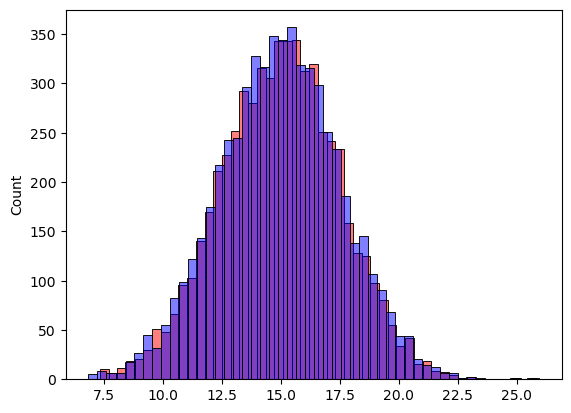

In [125]:
sns.histplot(y1_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y1_train, color='blue', alpha=0.5, bins=50)

<Axes: ylabel='Count'>

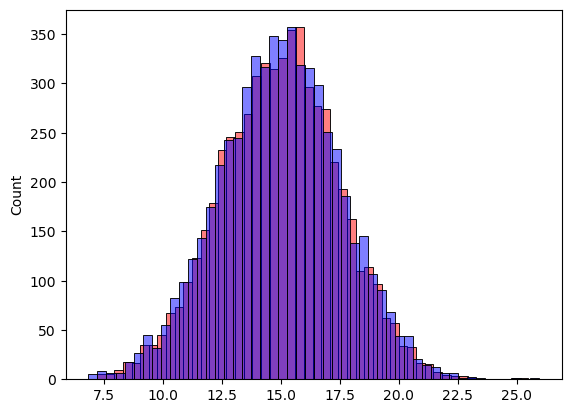

In [126]:
sns.histplot(y2_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y2_train, color='blue', alpha=0.5, bins=50)

In [127]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [128]:
rmse(y1_train, y1_pred)

0.4624399551535917

In [129]:
rmse(y2_train, y2_pred)

0.5202614265099076

In [130]:
y1_pred = w0_1 + df1_val.dot(w_1)
round(rmse(y1_val, y1_pred), 2)

0.46

In [131]:
y2_pred = w0_2 + df2_val.dot(w_2)
round(rmse(y2_val, y2_pred), 2)

0.52

### Question 4

In [133]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [134]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0_2, w_2 = train_linear_regression_reg(df2_train, y2_train, r=r)

    y2_pred = w0_2 + df2_val.dot(w_2)
    score = rmse(y2_val, y2_pred)
    
    print(r, w0_2, score)

0 28.827365473464873 0.5173782638837146
0.01 24.92683841940565 0.5171115525763144
0.1 11.239661084728656 0.5187525130702301
1 1.7315979411505915 0.5222348802092954
5 0.3638075020491346 0.5228916092823572
10 0.18306246621984135 0.5229812979636587
100 0.01841801730697718 0.5230636233819927


### Question 5

In [ ]:
def calculate_rmse(df, val, test, seed):
    df2 = df.copy()
    df2 = data.fillna(0)
    
    n = len(data)
    n_val = int(n * val)
    n_test = int(n * test)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df2_train = df2.iloc[idx[:n_train]]
    df2_val = df2.iloc[idx[n_train:n_train+n_val]]
    df2_test = df2.iloc[idx[n_train+n_val:]]
    df2_train = df2_train.reset_index(drop=True)
    df2_val = df2_val.reset_index(drop=True)
    df2_test = df2_test.reset_index(drop=True)
    
    y2_train = df2_train.fuel_efficiency_mpg.values
    y2_val = df2_val.fuel_efficiency_mpg.values
    y2_test = df2_test.fuel_efficiency_mpg.values

    del df2_train['fuel_efficiency_mpg']
    del df2_val['fuel_efficiency_mpg']
    del df2_test['fuel_efficiency_mpg']

    w0_2, w_2 = train_linear_regression(df2_train, y2_train)

    y2_pred = w0_2 + df2_val.dot(w_2)
    return rmse(y2_val, y2_pred)

In [139]:
rmse_list = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    rmse_score = calculate_rmse(data, 0.2, 0.2, seed)
    #rmse_score = rmse(y2_val, y2_pred)

    # store the results in a list
    #print(rmse_score)
    rmse_list.append(round(rmse_score, 3))

print(round(np.std(rmse_list), 3))

0.007


### Question 6

In [143]:
df2 = df.copy()
df2 = data.fillna(0)

n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df2_train = df2.iloc[idx[:n_train]]
df2_val = df2.iloc[idx[n_train:n_train+n_val]]
df2_test = df2.iloc[idx[n_train+n_val:]]
df2_train = df2_train.reset_index(drop=True)
df2_val = df2_val.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

y2_train = df2_train.fuel_efficiency_mpg.values
y2_val = df2_val.fuel_efficiency_mpg.values
y2_test = df2_test.fuel_efficiency_mpg.values

del df2_train['fuel_efficiency_mpg']
del df2_val['fuel_efficiency_mpg']
del df2_test['fuel_efficiency_mpg']

df2_train = pd.concat([df2_train, df2_val])
y2_train = np.concatenate([y2_train, y2_val])

w0_2, w_2 = train_linear_regression_reg(df2_train,
                                         y2_train, 
                                         0.001)
y2_pred = w0_2 + df2_test.dot(w_2)
rmse(y2_test, y2_pred)

0.5156261299202693